# Convección y difusión en una dimensión

## Estado estacionario

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Parámetros

In [77]:
L  = 1.0           # longitud del sistema 1D
nx = 42            # nodos espaciales
dx = L / (nx-2)    # sí, quitamos dos nodos ...
x = np.linspace( 0 , L , num=nx )



c = 20              # velocidad de la onda
D = 2              # difusividad

### ¡ Número de Péclet !

In [78]:
Pe = c * L / D
Pe

10.0

### Pura difusión

In [7]:
M = np.zeros( (nx, nx) )

In [22]:
for i in range(0,nx) :
    M[i,i] = -2

for i in range(0,nx-1) :
    M[ i, i+1 ] = 1

for i in range(1,nx) :
    M[ i, i-1 ] = 1

In [14]:
M

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]], shape=(42, 42))

In [16]:
unos = np.ones(nx)

In [17]:
M.dot( unos )

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1.])

In [18]:
b = np.zeros( nx )
b[0] = -1

In [20]:
u =  np.linalg.solve( M, b)

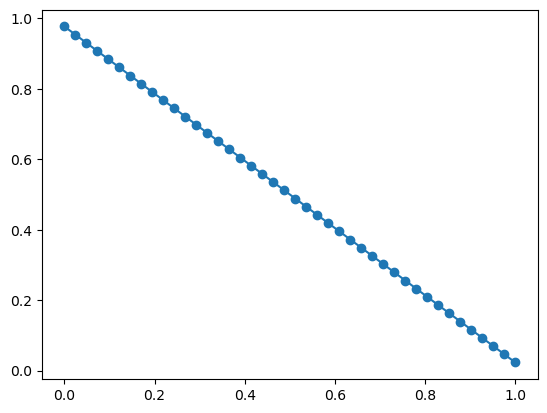

In [21]:
plt.plot( x , u , 'o-')

### Convección - difusión

In [79]:
Pe_dx = Pe * dx / L

In [80]:
for i in range(0,nx-1) :
    M[ i, i+1 ] = 1 - Pe_dx/2

for i in range(1,nx) :
    M[ i, i-1 ] = 1 + Pe_dx/2

In [81]:
M

array([[-2.   ,  0.875,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 1.125, -2.   ,  0.875, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.125, -2.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ..., -2.   ,  0.875,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  1.125, -2.   ,  0.875],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  1.125, -2.   ]],
      shape=(42, 42))

In [82]:
b[0] = -1 - Pe_dx/2

In [83]:
u =  np.linalg.solve( M, b)

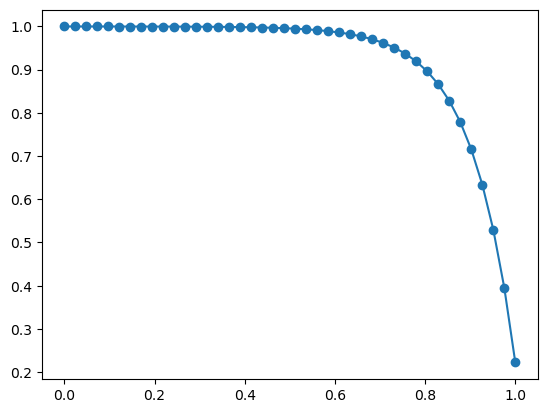

In [84]:
plt.plot( x , u , 'o-')

In [72]:
def solucion(x, P) :
    eP = np.exp(P)
    i = 0
    u = np.zeros( x.size )
    for xx in x:
        u[i] = (eP - np.exp( P * xx ) ) / (eP - 1 )
        i += 1
    return u

In [85]:
sol = solucion(x, Pe)

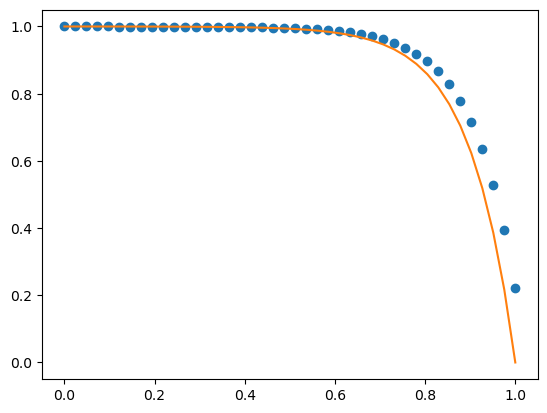

In [86]:
plt.plot( x , u , 'o', x, sol )